In [1]:
import numpy as np
import pandas as pd
import plotnine as p9

In [2]:
token_df = pd.read_csv('./tokens.csv')
token_df.reset_index(names = 'index', inplace = True)
token_df

,index,input_identifier,special_token,token
0,0,101,True,[CLS]
1,1,6064,False,dna
2,2,5537,False,sequence
3,3,4106,False,analysis
4,4,1997,False,of
...,...,...,...,...
349,349,19466,False,##hil
350,350,2401,False,##ia
351,351,1038,False,b
352,352,1012,False,.


In [3]:
attention_df = pd.read_csv('./attentions.csv').merge(token_df.copy().add_prefix('from_'), left_on = 'from', right_on = 'from_input_identifier').drop(columns = ['from', 'from_input_identifier']) \
  .merge(token_df.copy().add_prefix('to_'), left_on = 'to', right_on = 'to_input_identifier').drop(columns = ['to', 'to_input_identifier'])
attention_df

,weight,from_index,from_special_token,from_token,to_index,to_special_token,to_token
0,0.128505,0,True,[CLS],0,True,[CLS]
1,0.098838,1,False,dna,0,True,[CLS]
2,0.083938,2,False,sequence,0,True,[CLS]
3,0.083938,126,False,sequence,0,True,[CLS]
4,0.079370,2,False,sequence,0,True,[CLS]
...,...,...,...,...,...,...,...
2598539,0.274805,334,False,##dis,353,True,[SEP]
2598540,0.257224,335,False,##posed,353,True,[SEP]
2598541,0.248745,337,False,development,353,True,[SEP]
2598542,0.291518,343,False,inhibitors,353,True,[SEP]


# No threshold

In [4]:
attention_df['weight'].min()

8.169329e-05

In [5]:
attention_df['weight'].mean()

0.002513545929319564

In [6]:
attention_df['weight'].max()

0.41641188

In [7]:
#p9.scale_fill_gradient(low = '#67a9cf', high = '#ef8a62') + \
plot = p9.ggplot(attention_df,
  p9.aes(x = 'from_index', y = 'to_index', fill = 'weight')
  ) + \
  p9.geom_tile() + \
  p9.ylab('From index') + \
  p9.xlab('To index') + \
  p9.labs(fill = 'Attention\ncoefficient') + \
  p9.theme_bw() + \
  p9.theme(
    legend_position = 'right',
    legend_background = p9.element_rect(color = '#000000', fill = '#ebebeb'),
    legend_box_margin = 0,
    figure_size = (12, 9),
    text = p9.element_text(size = 25, family = 'serif'),
    axis_text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold', vjust = 0),
  )

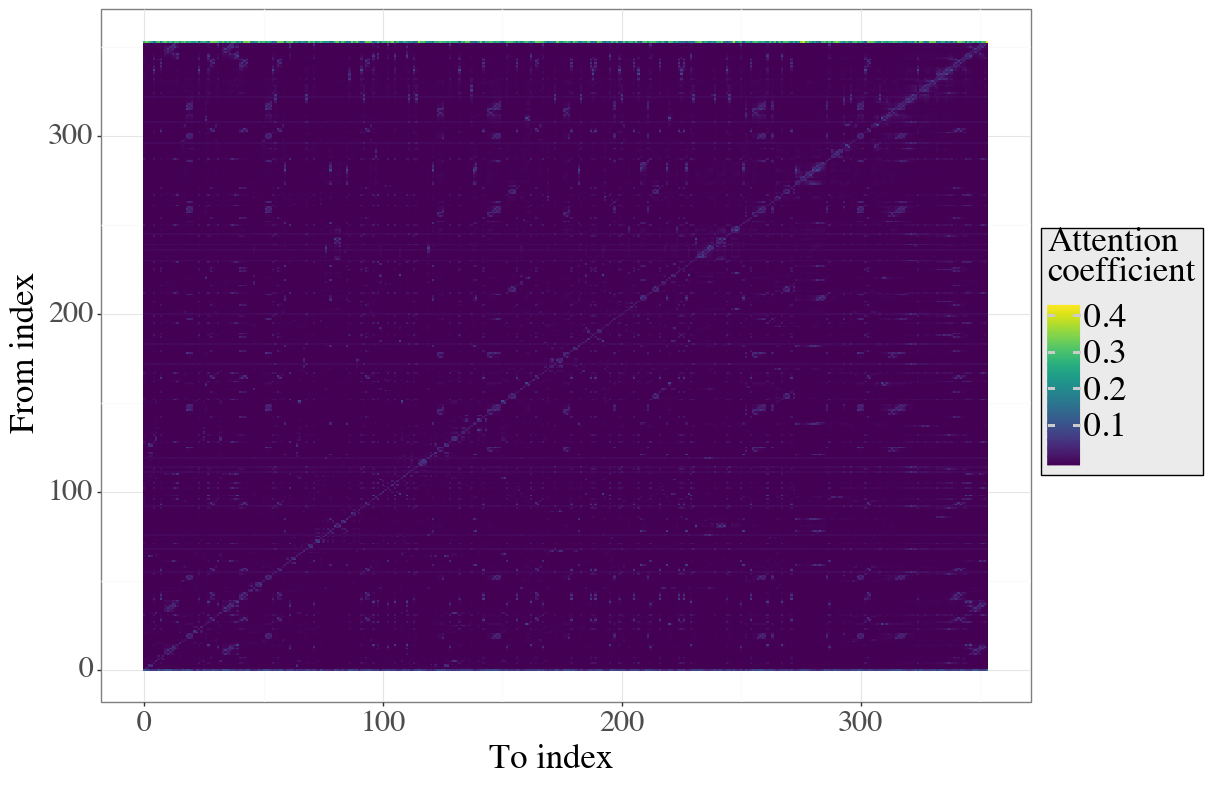

<ggplot: (402375425)>

In [8]:
plot

In [9]:
plot.save(filename = './heatmap_no_threshold.png', dpi = 300)

/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 12 x 9 in image.
/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./heatmap_no_threshold.png


# 0.95 quantile threshold

In [10]:
attention_df_no_special = attention_df[(~attention_df['from_special_token']) & (~attention_df['to_special_token'])]
filtered_attention_df = attention_df_no_special[attention_df_no_special['weight'] >= np.quantile(attention_df_no_special['weight'].values, 0.95)]

In [11]:
attention_df[attention_df['weight'] >= np.quantile(attention_df['weight'].values, 0.95)]['weight'].max()

0.41641188

In [12]:
filtered_attention_df['weight'].max()

0.11905919

In [13]:
filtered_attention_df['weight'].mean()

0.022903323663616443

In [14]:
filtered_attention_df['weight'].min()

0.010670112

In [15]:
#p9.scale_fill_gradient(low = '#67a9cf', high = '#ef8a62') + \
plot = p9.ggplot(filtered_attention_df,
  p9.aes(x = 'from_index', y = 'to_index', fill = 'weight')
  ) + \
  p9.geom_tile() + \
  p9.ylab('From index') + \
  p9.xlab('To index') + \
  p9.labs(fill = 'Attention\ncoefficient') + \
  p9.theme_bw() + \
  p9.theme(
    legend_position = 'right',
    legend_background = p9.element_rect(color = '#000000', fill = '#ebebeb'),
    legend_box_margin = 0,
    figure_size = (12, 9),
    text = p9.element_text(size = 25, family = 'serif'),
    axis_text = p9.element_text(size = 22),
    axis_title = p9.element_text(weight = 'bold'),
    legend_title = p9.element_text(weight = 'bold', vjust = 0),
  )

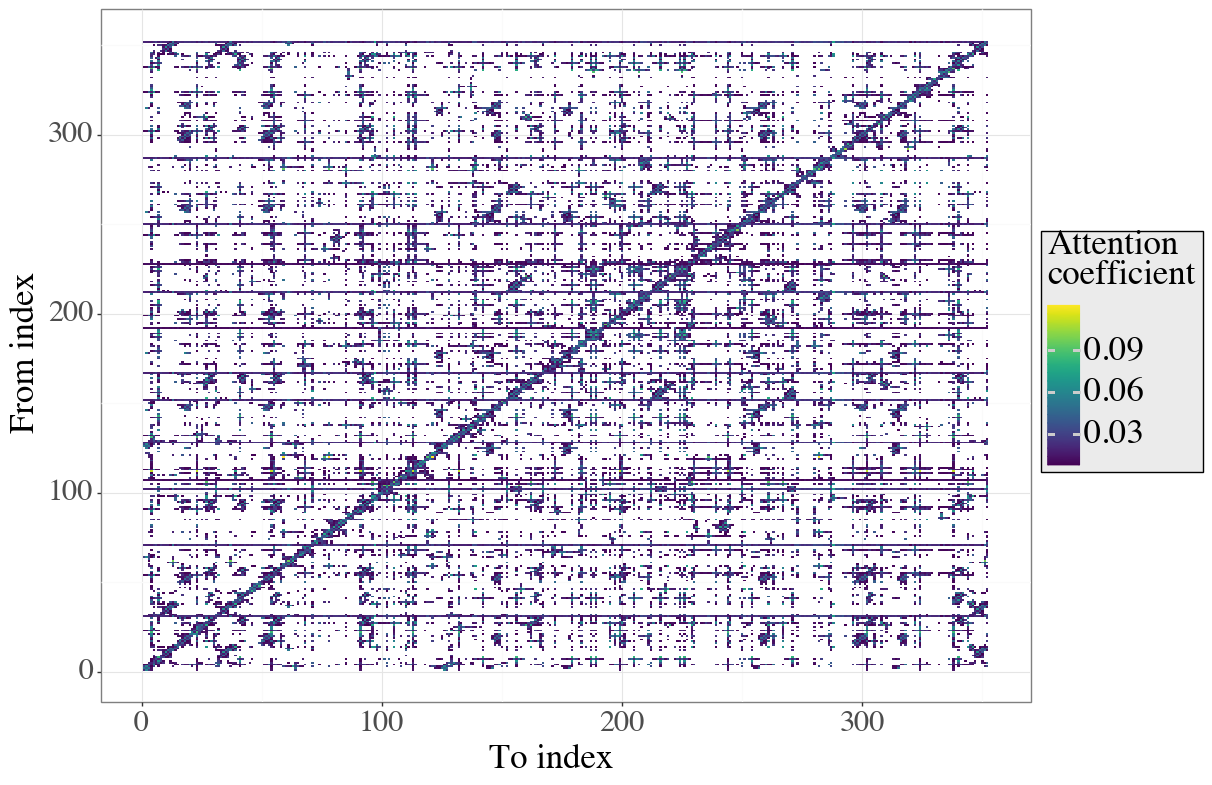

<ggplot: (402446949)>

In [16]:
plot

In [17]:
plot.save(filename = './heatmap_Q95_threshold.png', dpi = 300)

/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 12 x 9 in image.
/opt/homebrew/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./heatmap_Q95_threshold.png
